In [1]:
library(ggplot2) # ggplot2 패키지 로딩
library(tseries)

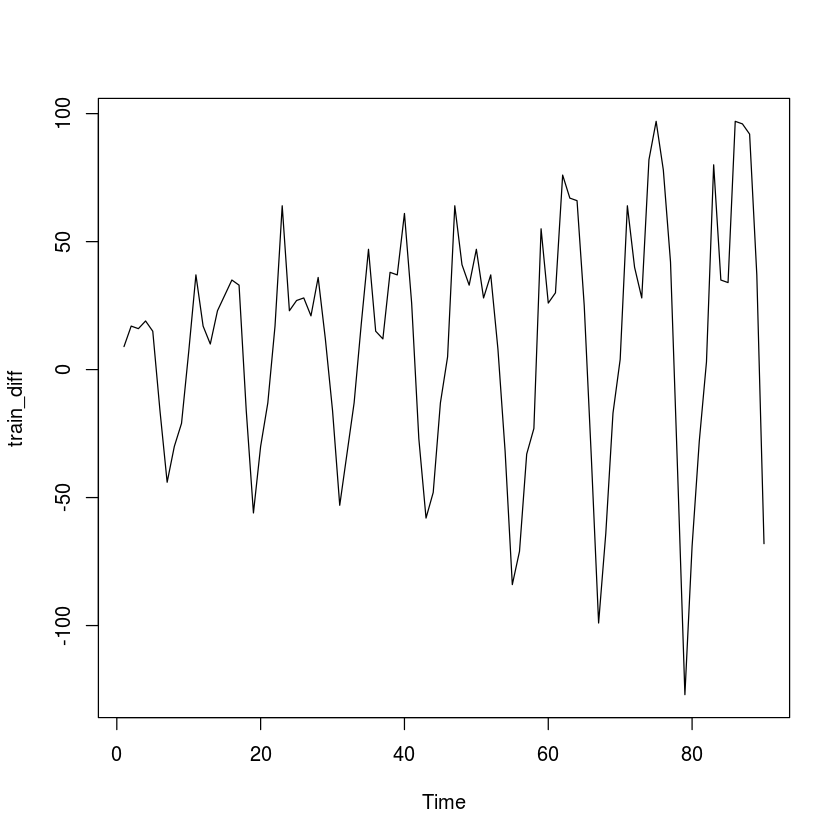

In [176]:
data <- read.csv("dataset/international-airline-passengers.csv", header=T)
names(data) <- c('date', 'x')

index <- (dim(data)[1] - 49):dim(data)[1]
train <- data[-index,]
test <- data[index,]

train_diff <- diff(train$x, 4)
test_diff <- diff(test, 4)

plot.ts(train_diff, type='l')

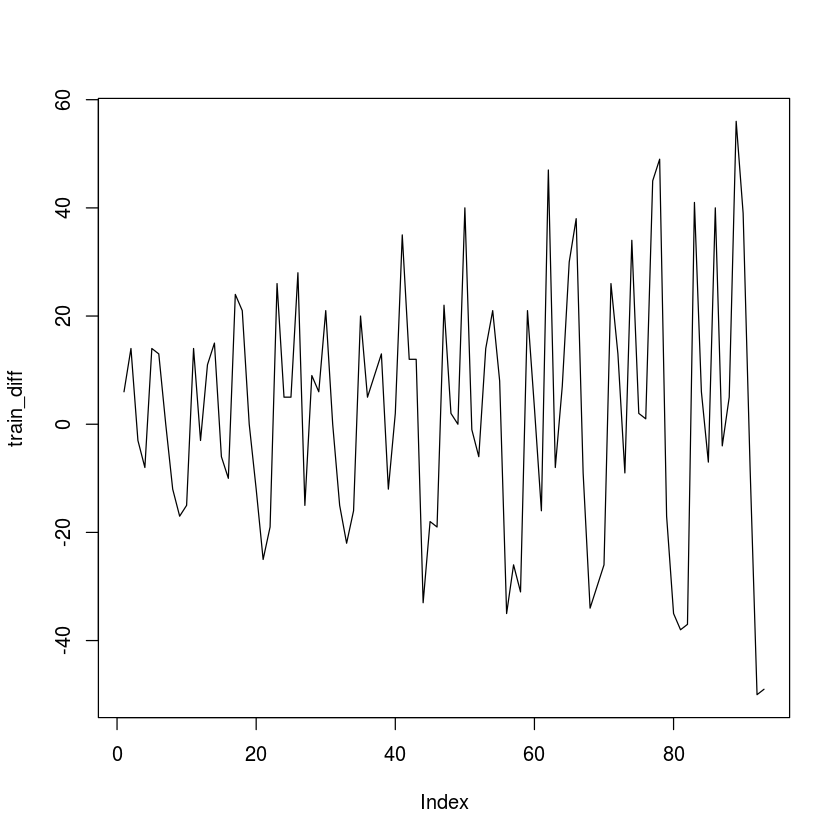

In [119]:
plot(train_diff, type='l')

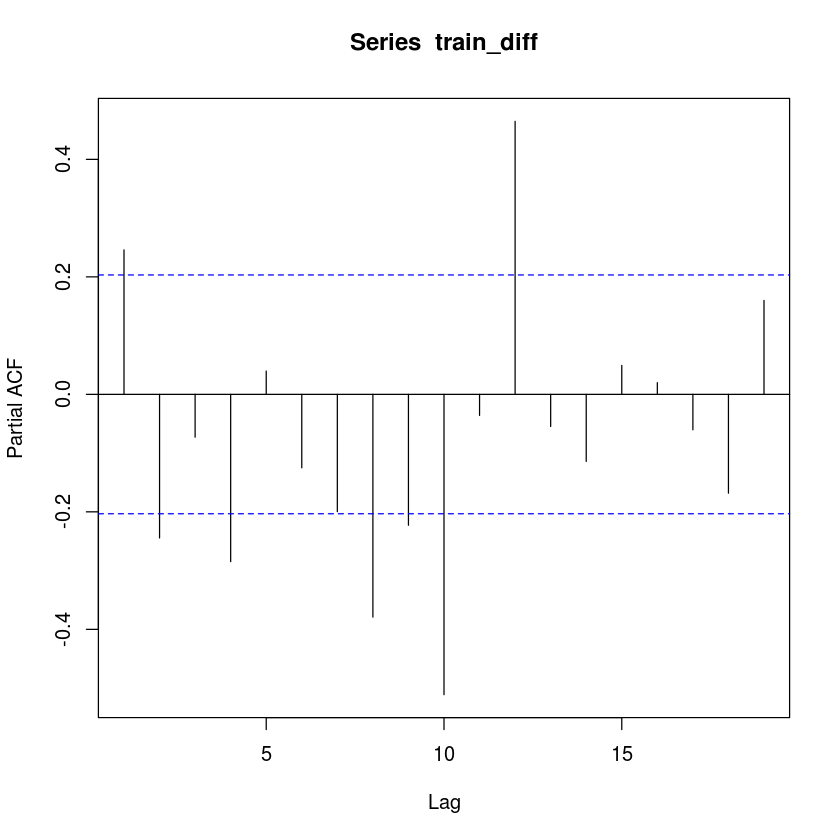

In [127]:
pacf(train_diff)

In [132]:
adf.test(train_diff)

Warning message in adf.test(train_diff):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  train_diff
Dickey-Fuller = -4.4795, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


$coef
       ar1        ar2  intercept 
 1.0487018 -0.4987412  9.4101723 

$sigma2
[1] 890.0358

$var.coef
                   ar1          ar2    intercept
ar1        0.009495285 -0.006736028 -0.019944444
ar2       -0.006736028  0.009527997 -0.008625669
intercept -0.019944444 -0.008625669 48.978569940

$mask
[1] TRUE TRUE TRUE

$loglik
[1] -433.3112

$aic
[1] NA

$arma
[1] 2 0 0 0 1 0 0

$residuals
Time Series:
Start = 1 
End = 90 
Frequency = 1 
 [1]   0.000000   0.000000  -1.574208   6.464423  -1.180424 -26.489393
 [7] -23.974602   3.928073 -15.718505   9.825555  14.950575 -22.545727
[13]   6.390545  16.756634   5.632322  11.823747   6.523983 -37.386167
[19] -26.997260  16.512495 -13.703399  11.435940  35.453486 -39.873264
[25]  30.564345   6.921150   0.867413  23.707067 -19.514648 -14.864688
[31] -34.470825  10.366389  -9.061070  10.939717  17.404784 -29.546592
[37]  15.475360  28.661748  -1.100723  36.915250 -23.752335 -28.077984
[43] -20.952729  -4.876255   4.175751  -9.541401  48

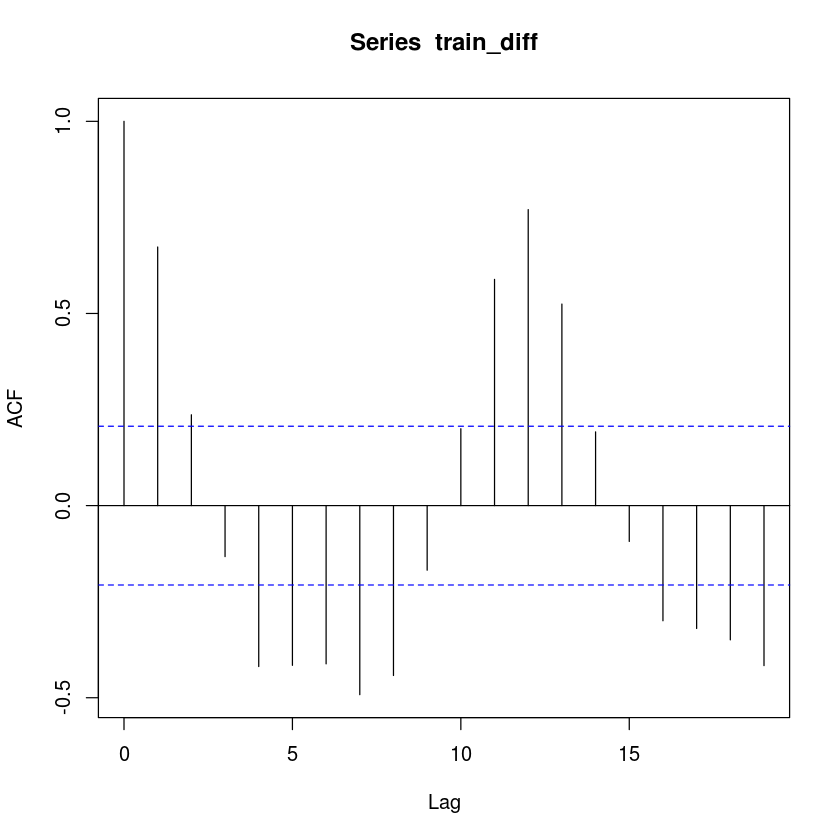

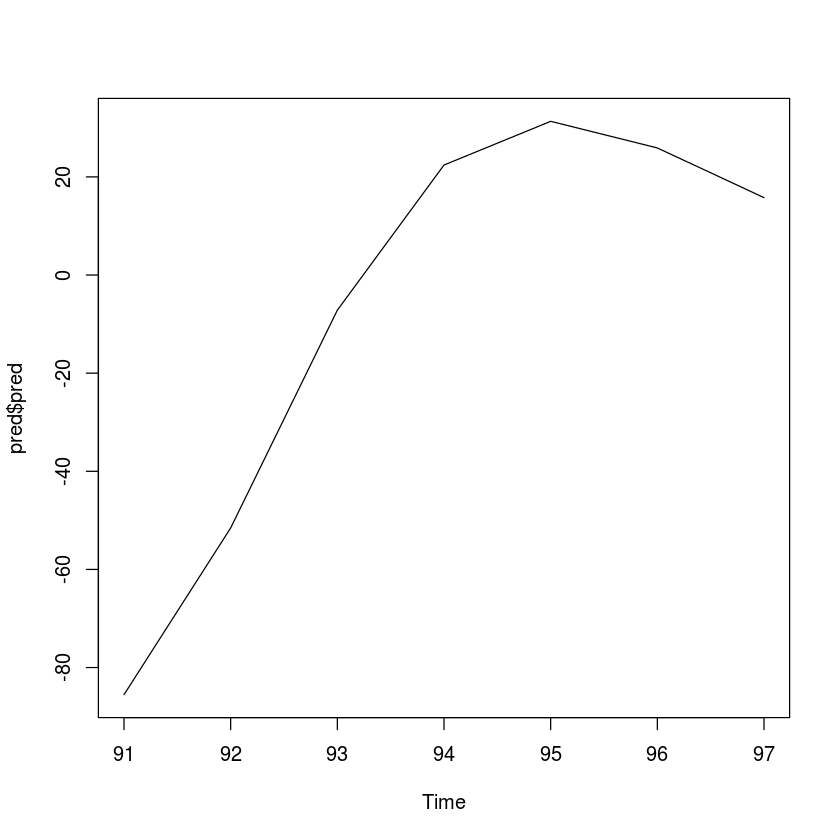

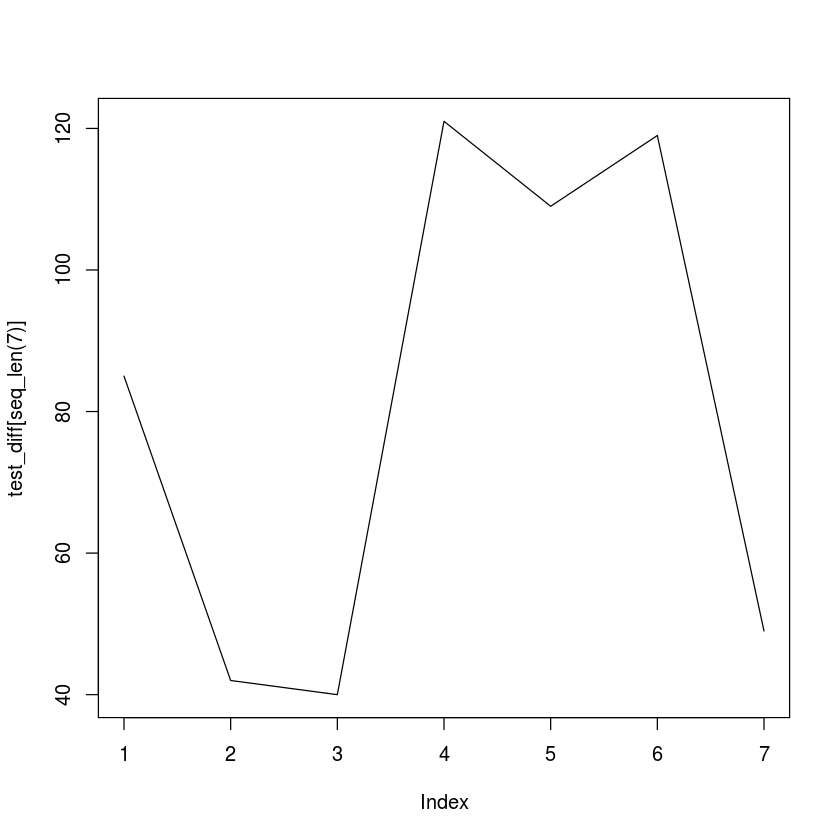

In [140]:
fit <- arima(train_diff, order=c(2, 0, 0), method='CSS')
unclass(fit)
acf(train_diff)
pred <- predict(fit, 7)
plot(pred$pred)
plot(test_diff[seq_len(7)], type='l')